In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#crime=pd.read_csv(r'C:\Users\Rachel\Desktop\ML\final\crime19.csv')\
crime=pd.read_csv(r'C:\Users\Me\Desktop\ML\final\Crime_Data_from_2010_to_2019.csv')


In [3]:
print(crime.shape)

(2115055, 28)


In [4]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
labels=crime[['AREA ', 'AREA NAME', 'Crm Cd','Crm Cd Desc', 'Premis Cd','Premis Desc','Weapon Used Cd', 'Weapon Desc','Status','Status Desc']]

In [6]:
crime=crime.drop(['DATE OCC', 'AREA NAME',
       'Crm Cd Desc','Mocodes',
          'Premis Desc',
        'Weapon Desc',  'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT','LON'], axis=1)

In [7]:
crime=crime.rename(columns={'TIME OCC':'time' ,'DR_NO':'id', 'Date Rptd':'date', 'AREA ':'area', 'Rpt Dist No':'district_number', 'Part 1-2':'part', 'Crm Cd':'crime_code', 
       'Vict Age':'age', 'Vict Sex':'sex', 'Vict Descent':'descent', 'Premis Cd':'premis', 
       'Weapon Used Cd':'weapon', 'Status':'status', 'LOCATION':'location'})

In [8]:
crime.isnull().sum()

id                       0
date                     0
time                     0
area                     0
district_number          0
part                     0
crime_code               0
age                      0
sex                 196671
descent             196717
premis                  53
weapon             1404685
status                   3
location                 0
dtype: int64

In [9]:
token='N'
crime.sex=crime.sex.fillna(token)
crime.weapon=crime.weapon.fillna(token)
crime.descent=crime.descent.fillna(token)

crime=crime.dropna(how='any')
print(crime.isnull().sum())

id                 0
date               0
time               0
area               0
district_number    0
part               0
crime_code         0
age                0
sex                0
descent            0
premis             0
weapon             0
status             0
location           0
dtype: int64


In [10]:
crime['month_year'] =pd.to_datetime(crime['date']).dt.to_period('M')
crime=crime.drop(['date'], axis=1)

In [11]:
# there are many data which age = 0 doesn't make any  sense
crime[crime.age==0].shape

(369863, 14)

In [12]:
# make timeline same with budget
crime_11_12=crime[crime.month_year>'2011-11'].sort_values(by='month_year').reset_index(drop=True)

### Budegt

In [13]:
#budget=pd.read_csv(r'C:\Users\Rachel\Desktop\ML\final\budget.csv')
budget=pd.read_csv(r'C:\Users\Me\Desktop\ML\final\Police_Budget_Activity.csv')

In [14]:
#drop columns after total expenditures
budget=budget.iloc[:,:32]

#drop missing values morethan 20000.
budget=budget.drop(['ADOPTED EXPENSE BUDGET','REVENUE SOURCE CATEGORY','REVENUE SOURCE CATEGORY NAME','REVENUE SOURCE CLASS','REVENUE SOURCE CLASS NAME','REVENUE SOURCE','REVENUE SOURCE NAME'], axis=1)
#drop same values columns
#'DEPARTMENT', 'DEPARTMENT NAME','AFR TYPE','DEPARTMENTAL INDICATOR','FUND GROUP','FUND GROUP NAME'bu
budget=budget.drop(['FUND GROUP NAME','FUND NAME','FISCAL PERIOD NAME','FUND TYPE NAME','DEPARTMENT', 'DEPARTMENT NAME','ACCOUNT NAME', 'CAFR TYPE','ACCOUNT TYPE NAME','DEPARTMENTAL INDICATOR','ACCOUNT GROUP NAME','FUND GROUP','FUND GROUP NAME'], axis=1)

In [15]:
token='UNK'
budget=budget.fillna(token)

In [16]:
a=budget.columns.map(lambda x: x.lower().replace(' ', '_'))
budget.columns=a
budget['month_year']=pd.to_datetime(budget['fiscal_period'], format='%Y%m').dt.to_period('M')
budget=budget.drop(['fiscal_period'], axis=1)
budget=budget.sort_values(by='month_year').reset_index(drop=True)

In [17]:
# total cases of crime by month
total=crime_11_12.groupby(['month_year']).size().to_frame()
crime_11_12=pd.merge(crime_11_12, total, on='month_year',how='left')

In [18]:
#total budget by month
total_budget=budget.groupby('month_year')['total_expenditures'].sum().to_frame()
crime_11_12=pd.merge(crime_11_12,total_budget, on='month_year', how='left')

In [19]:
crime_11_12

,id,time,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,location,month_year,0,total_expenditures
0,111721860,2200,17,1756,1,330,32,M,A,104.0,N,IC,17600 MAYALL ST,2011-12,16246,6.820457e+08
1,111522020,2245,15,1527,1,442,0,M,W,404.0,N,IC,11000 VICTORY BL,2011-12,16246,6.820457e+08
2,111432710,1220,14,1483,1,510,0,N,N,101.0,N,IC,LINCOLN,2011-12,16246,6.820457e+08
3,111924380,1200,19,1987,2,354,55,M,O,501.0,N,IC,8600 KATHERINE AV,2011-12,16246,6.820457e+08
4,110120970,2020,1,191,1,510,0,N,N,101.0,N,IC,17TH ST,2011-12,16246,6.820457e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732870,201711824,1400,17,1761,1,331,49,M,O,509.0,N,IC,21500 LASSEN ST,2020-08,8,1.447240e+08
1732871,201912858,1,19,1969,1,121,26,F,O,502.0,400,IC,ARLETA,2020-08,8,1.447240e+08
1732872,200115750,1620,1,121,2,354,36,F,B,710.0,N,IC,900 W TEMPLE ST,2020-08,8,1.447240e+08
1732873,202012875,1000,20,2029,2,649,42,M,W,502.0,N,IC,500 S WESTMORELAND AV,2020-08,8,1.447240e+08


In [20]:
#rename 
crime_new=crime_11_12.rename(columns={0:'total_crime'})

In [21]:
crime_new=crime_new.drop(columns=['id', 'location'], axis=1)

In [22]:
crime_new['total_expenditures']=crime_new['total_expenditures'].map(lambda x: "{:.2f}".format(float(x)))

In [23]:
# change data type of time to hours and minutes
crime_new['time']=crime_new['time'].astype('str')
crime_new['time']=['{0}'.format(i.zfill(4)) for i in crime_new['time']]
crime_new['time']=pd.to_datetime(crime_new['time'],format='%H%M').dt.strftime('%H:%M')

In [24]:
crime_new.head()

,time,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures
0,22:00,17,1756,1,330,32,M,A,104.0,N,IC,2011-12,16246,682045743.42
1,22:45,15,1527,1,442,0,M,W,404.0,N,IC,2011-12,16246,682045743.42
2,12:20,14,1483,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42
3,12:00,19,1987,2,354,55,M,O,501.0,N,IC,2011-12,16246,682045743.42
4,20:20,1,191,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42


In [25]:
temp=[]
# 根据差值进行打分
for i in crime_new['time']:
    a = 0
    if (i >= "00:00") and (i <="06:00"):
        a= 0
    elif (i>'06:00') and (i <='12:00'):
        a=1
    elif (i>'12:00') and (i<='18:00'):
        a=2
    else:
        a=3
    temp.append(a)

In [26]:
crime_new['time_class']=temp

In [27]:
#0: midnight 1: morning 2:afternoon 3:evening
crime_new.head()

,time,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures,time_class
0,22:00,17,1756,1,330,32,M,A,104.0,N,IC,2011-12,16246,682045743.42,3
1,22:45,15,1527,1,442,0,M,W,404.0,N,IC,2011-12,16246,682045743.42,3
2,12:20,14,1483,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42,2
3,12:00,19,1987,2,354,55,M,O,501.0,N,IC,2011-12,16246,682045743.42,1
4,20:20,1,191,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42,3


In [28]:
# move time_class to front
mid = crime_new['time_class']
crime_new.drop(labels=['time_class'], axis=1, inplace = True)
crime_new.insert(1, 'time_class', mid)

In [29]:
crime_new.head()

,time,time_class,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures
0,22:00,3,17,1756,1,330,32,M,A,104.0,N,IC,2011-12,16246,682045743.42
1,22:45,3,15,1527,1,442,0,M,W,404.0,N,IC,2011-12,16246,682045743.42
2,12:20,2,14,1483,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42
3,12:00,1,19,1987,2,354,55,M,O,501.0,N,IC,2011-12,16246,682045743.42
4,20:20,3,1,191,1,510,0,N,N,101.0,N,IC,2011-12,16246,682045743.42


In [30]:
crimeCorr_new = crime_new.corr()
crimeCorr_new


,time_class,area,district_number,part,crime_code,age,premis,total_crime
time_class,1.000000,0.008473,0.008671,-0.063721,0.014714,-0.052340,-0.097116,0.008283
area,0.008473,1.000000,0.999017,0.005001,-0.003881,0.005392,0.006944,-0.010107
district_number,0.008671,0.999017,1.000000,0.004863,-0.003900,0.005595,0.006893,-0.009971
part,-0.063721,0.005001,0.004863,1.000000,0.728358,0.139943,0.229616,-0.028289
crime_code,0.014714,-0.003881,-0.003900,0.728358,1.000000,-0.036265,0.105259,-0.004485
age,-0.052340,0.005392,0.005595,0.139943,-0.036265,1.000000,0.162575,-0.000484
premis,-0.097116,0.006944,0.006893,0.229616,0.105259,0.162575,1.000000,-0.036873
total_crime,0.008283,-0.010107,-0.009971,-0.028289,-0.004485,-0.000484,-0.036873,1.000000


In [31]:
#There is a very strong correlation between area and district number.  
#Therefore, we should remove district_number from the variables.  
#There is also a moderately strong correlation between crime_code and part.
#We may want to look further if one of these variables can be removed.

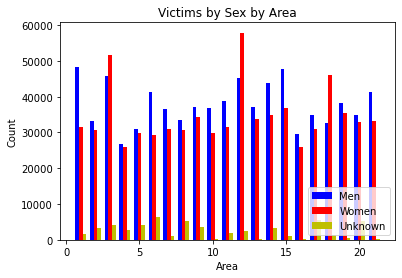

In [32]:
#print(crime_new.groupby('area').count())
crime_new1 = crime_new[crime_new.sex.isin(['M','F','X'])]
men = crime_new1[crime_new1.sex.isin(['M'])].groupby('area').count().sex
women = crime_new1[crime_new1.sex.isin(['F'])].groupby('area').count().sex
unknown = crime_new1[crime_new1.sex.isin(['X'])].groupby('area').count().sex
indices = sorted(crime_new.area.unique())
#Calculate optimal width
width = np.min(np.diff(indices))/4

plt.bar(indices-width,men,width,color='b',label='Men')
plt.bar(indices,women,width,color='r',label='Women')
plt.bar(indices+width,unknown,width,color='y',label='Unknown')
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Victims by Sex by Area')
plt.legend(loc='lower right')
plt.show()


In [33]:
#It appears areas 3 (Southwest) and 12 (77th Street) have the overal highest crime, 
#whereas areas 4 (Hollenbeck) and 16 (Foothill) have the lowest crime rates.
#In most areas, more victims are males, except in areas 3 (Southwest), 12 (77th Street), and 18 (Southeast).

In [34]:
#print(crime_new.groupby('area').count())
lateNight = crime_new[crime_new.time_class.isin([0])].groupby('area').count().time_class
morning = crime_new[crime_new.time_class.isin([1])].groupby('area').count().time_class
afternoon = crime_new[crime_new.time_class.isin([2])].groupby('area').count().time_class
evening = crime_new[crime_new.time_class.isin([3])].groupby('area').count().time_class
indices = sorted(crime_new.area.unique())
#Calculate optimal width
width = np.min(np.diff(indices))/5


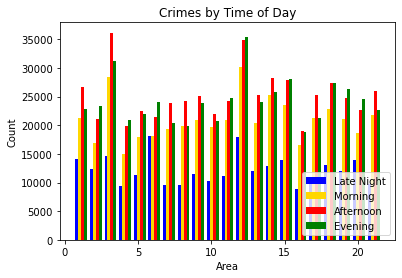

In [35]:
plt.bar(indices-width,lateNight,width,color='b',label='Late Night')
plt.bar(indices,morning,width,color='gold',label='Morning')
plt.bar(indices+width,afternoon,width,color='r',label='Afternoon')
plt.bar(indices+width+width,evening,width,color='g',label='Evening')
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Crimes by Time of Day')
plt.legend(loc='lower right')
plt.show()

In [36]:
#It can be seen from the graphs, that most of the crime happens in the afternoons and evenings.  
#The least amount of crime happens late at night between midnight and 6AM.

In [37]:
# move time_class to front
mid = crime_new['time_class']
crime_new.drop(labels=['time_class'], axis=1, inplace = True)
crime_new.insert(1, 'time_class', mid)

In [38]:
crime_new.sample(n=10,random_state=2)

,time,time_class,area,district_number,part,crime_code,age,sex,descent,premis,weapon,status,month_year,total_crime,total_expenditures
46520,22:00,3,12,1258,2,930,16,F,H,501.0,511,IC,2012-02,15278,96190631.18
1122636,00:01,0,17,1785,2,354,37,F,B,501.0,N,IC,2017-05,19649,nan
1717924,12:10,2,5,551,1,421,49,M,W,101.0,N,AA,2019-12,18154,nan
1088700,18:00,2,2,248,1,220,23,M,H,502.0,400,IC,2017-03,19589,114398967.34
595018,21:00,3,17,1737,1,330,23,F,O,101.0,N,IC,2014-12,17076,108487680.60
1430900,12:30,2,18,1824,1,310,70,F,B,501.0,N,AA,2018-08,19786,126572239.16
1455170,22:30,3,6,657,2,624,26,M,B,501.0,400,AO,2018-10,19853,122883330.94
860709,11:15,1,8,828,1,351,60,F,O,124.0,400,AA,2016-03,18500,109400422.51
410492,18:30,3,7,722,1,442,28,M,H,404.0,N,AA,2014-01,15488,109085917.29
1329236,08:45,1,17,1762,2,740,39,M,H,501.0,N,AA,2018-03,19152,130212100.01


In [39]:
crime_new.month_year.unique()

<PeriodArray>
['2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
 '2012-07', '2012-08', '2012-09',
 ...
 '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
 '2020-06', '2020-07', '2020-08']
Length: 105, dtype: period[M]

In [40]:
##Get how we want to aggregate the data

In [41]:
crime_new.district_number.nunique()

1278

In [43]:
import dexplot as dxp
import seaborn as sns

In [44]:
crime_new.area.value_counts()

12    118336
3     110582
15     93345
14     92319
18     90751
1      84856
19     84044
13     81805
6      81768
9      81461
11     81106
21     79915
20     79746
17     77544
5      73812
2      73609
8      73584
7      73297
10     72781
4      64910
16     63304
Name: area, dtype: int64

In [45]:
crime_new['year'] = crime_new.month_year.values.astype('datetime64[Y]')
crime_new['year'] = pd.to_datetime(crime_new['year']).dt.year

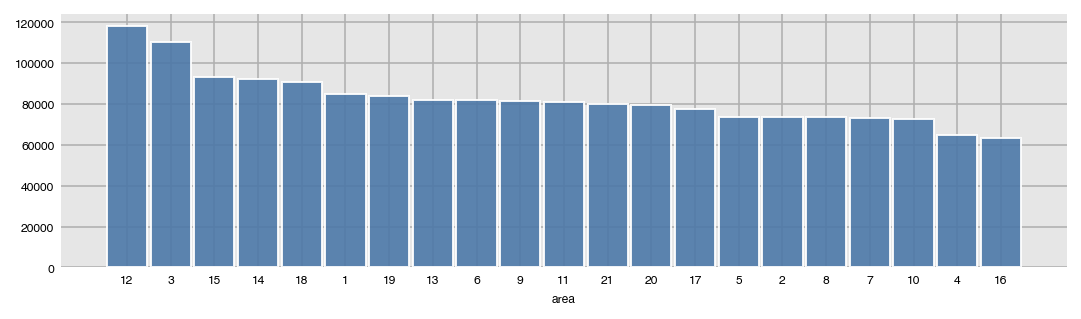

In [46]:
dxp.count(val='area',data=crime_new)

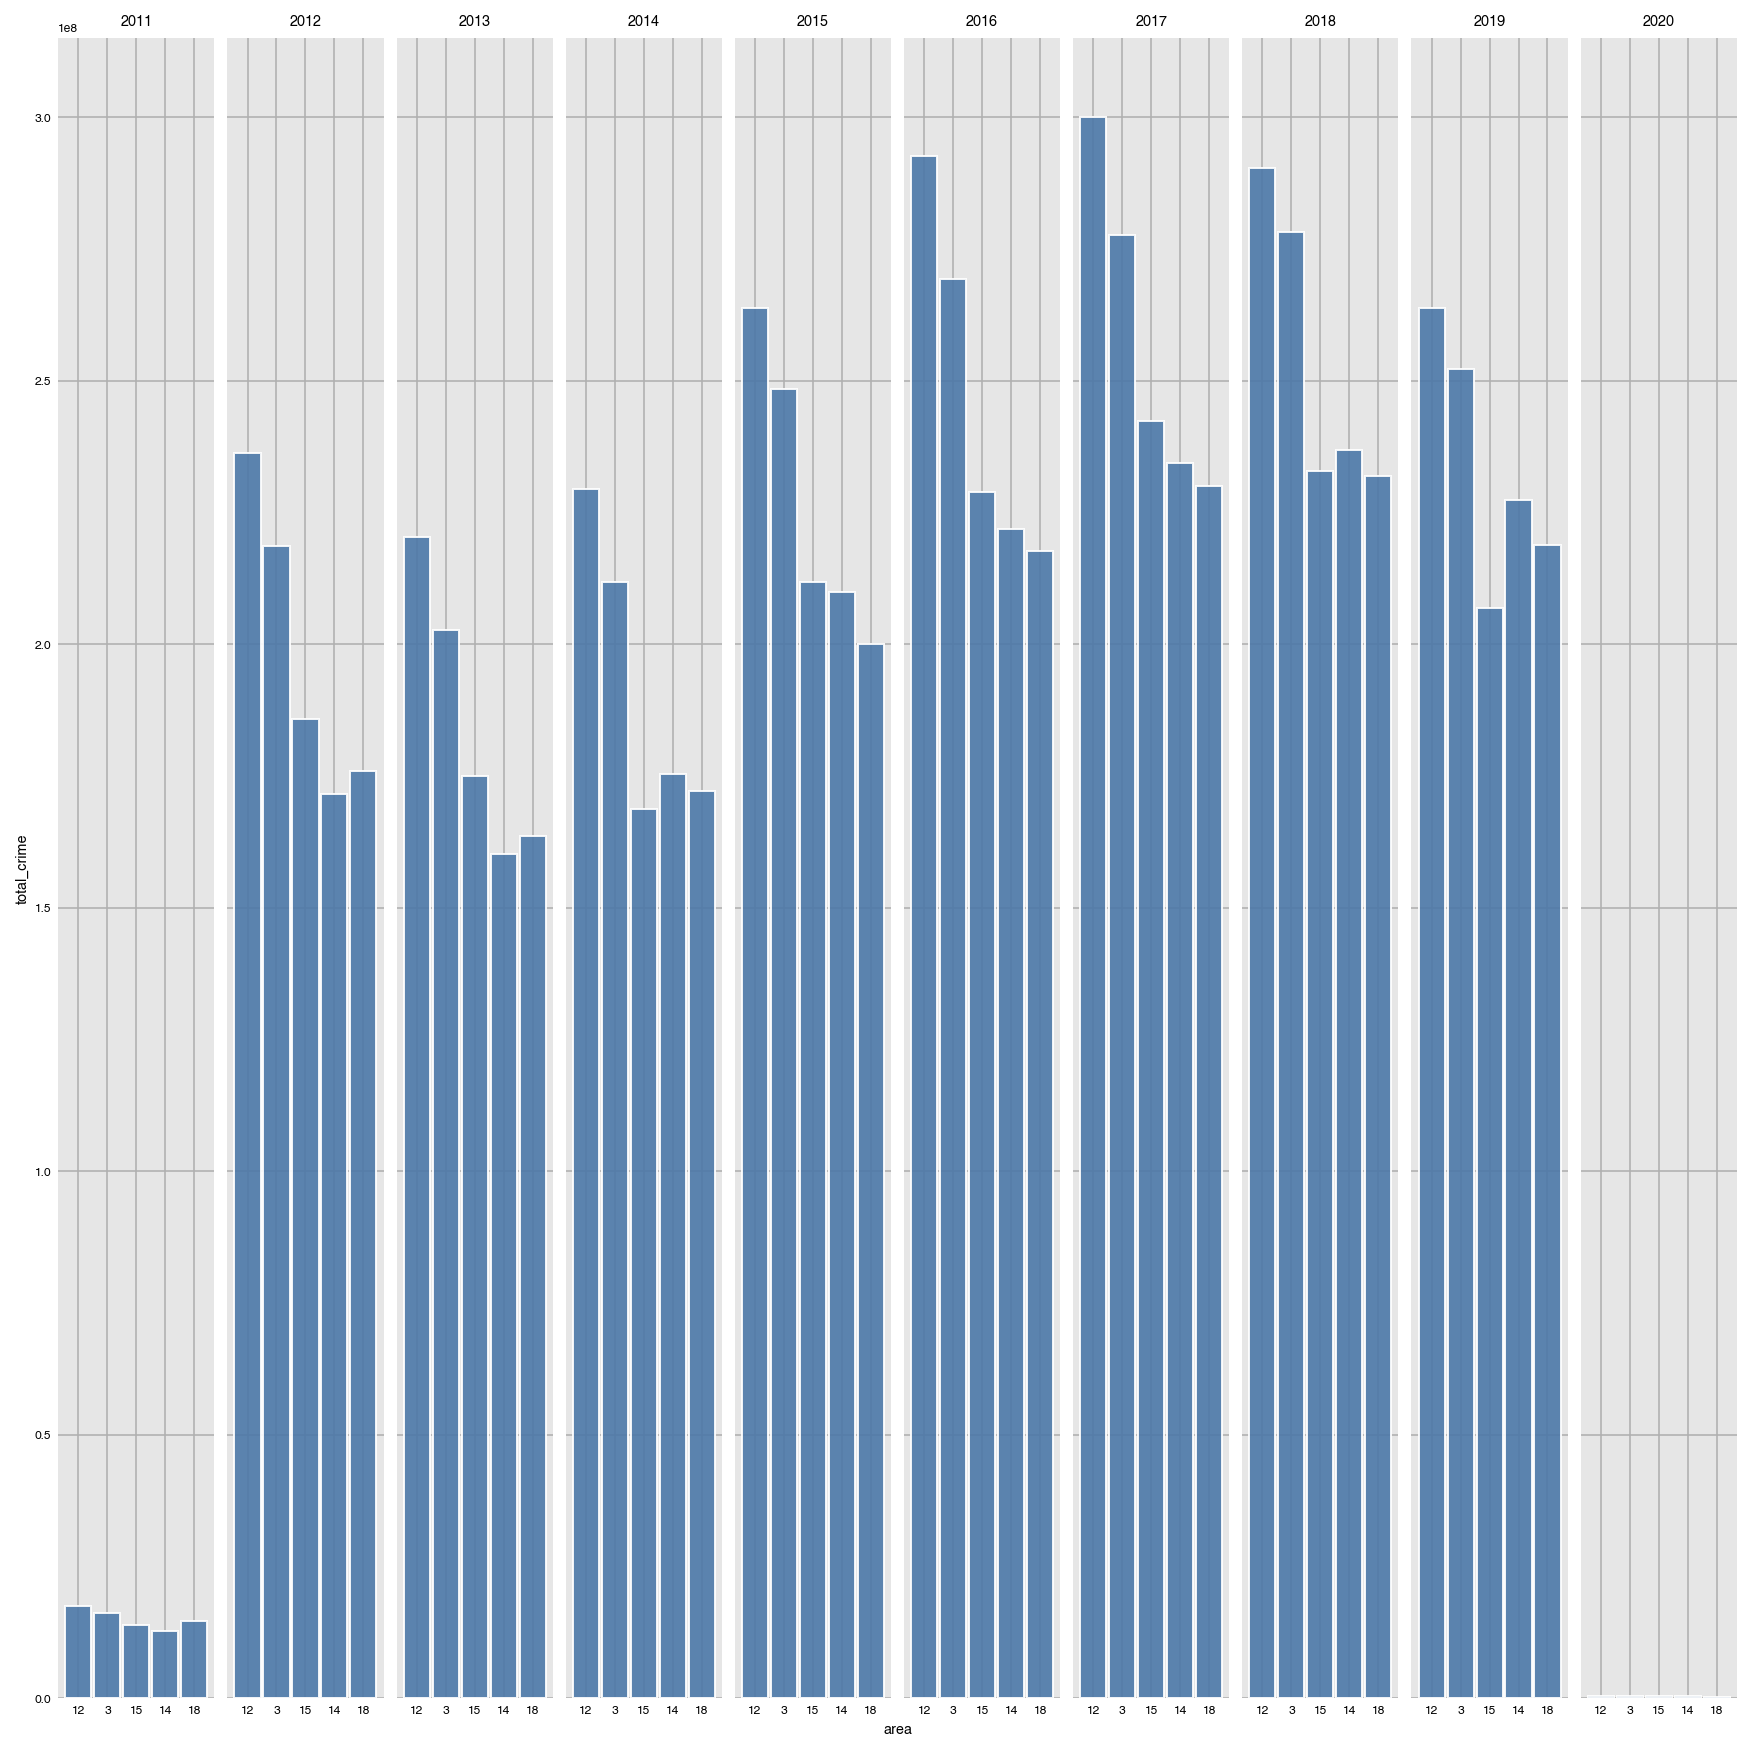

In [47]:
dxp.bar(x='area', y='total_crime', data=crime_new, aggfunc='sum',
        col='year',figsize=(12,12),size=0.9, x_order= 'top 5')
##, col='area'##split='time_class'

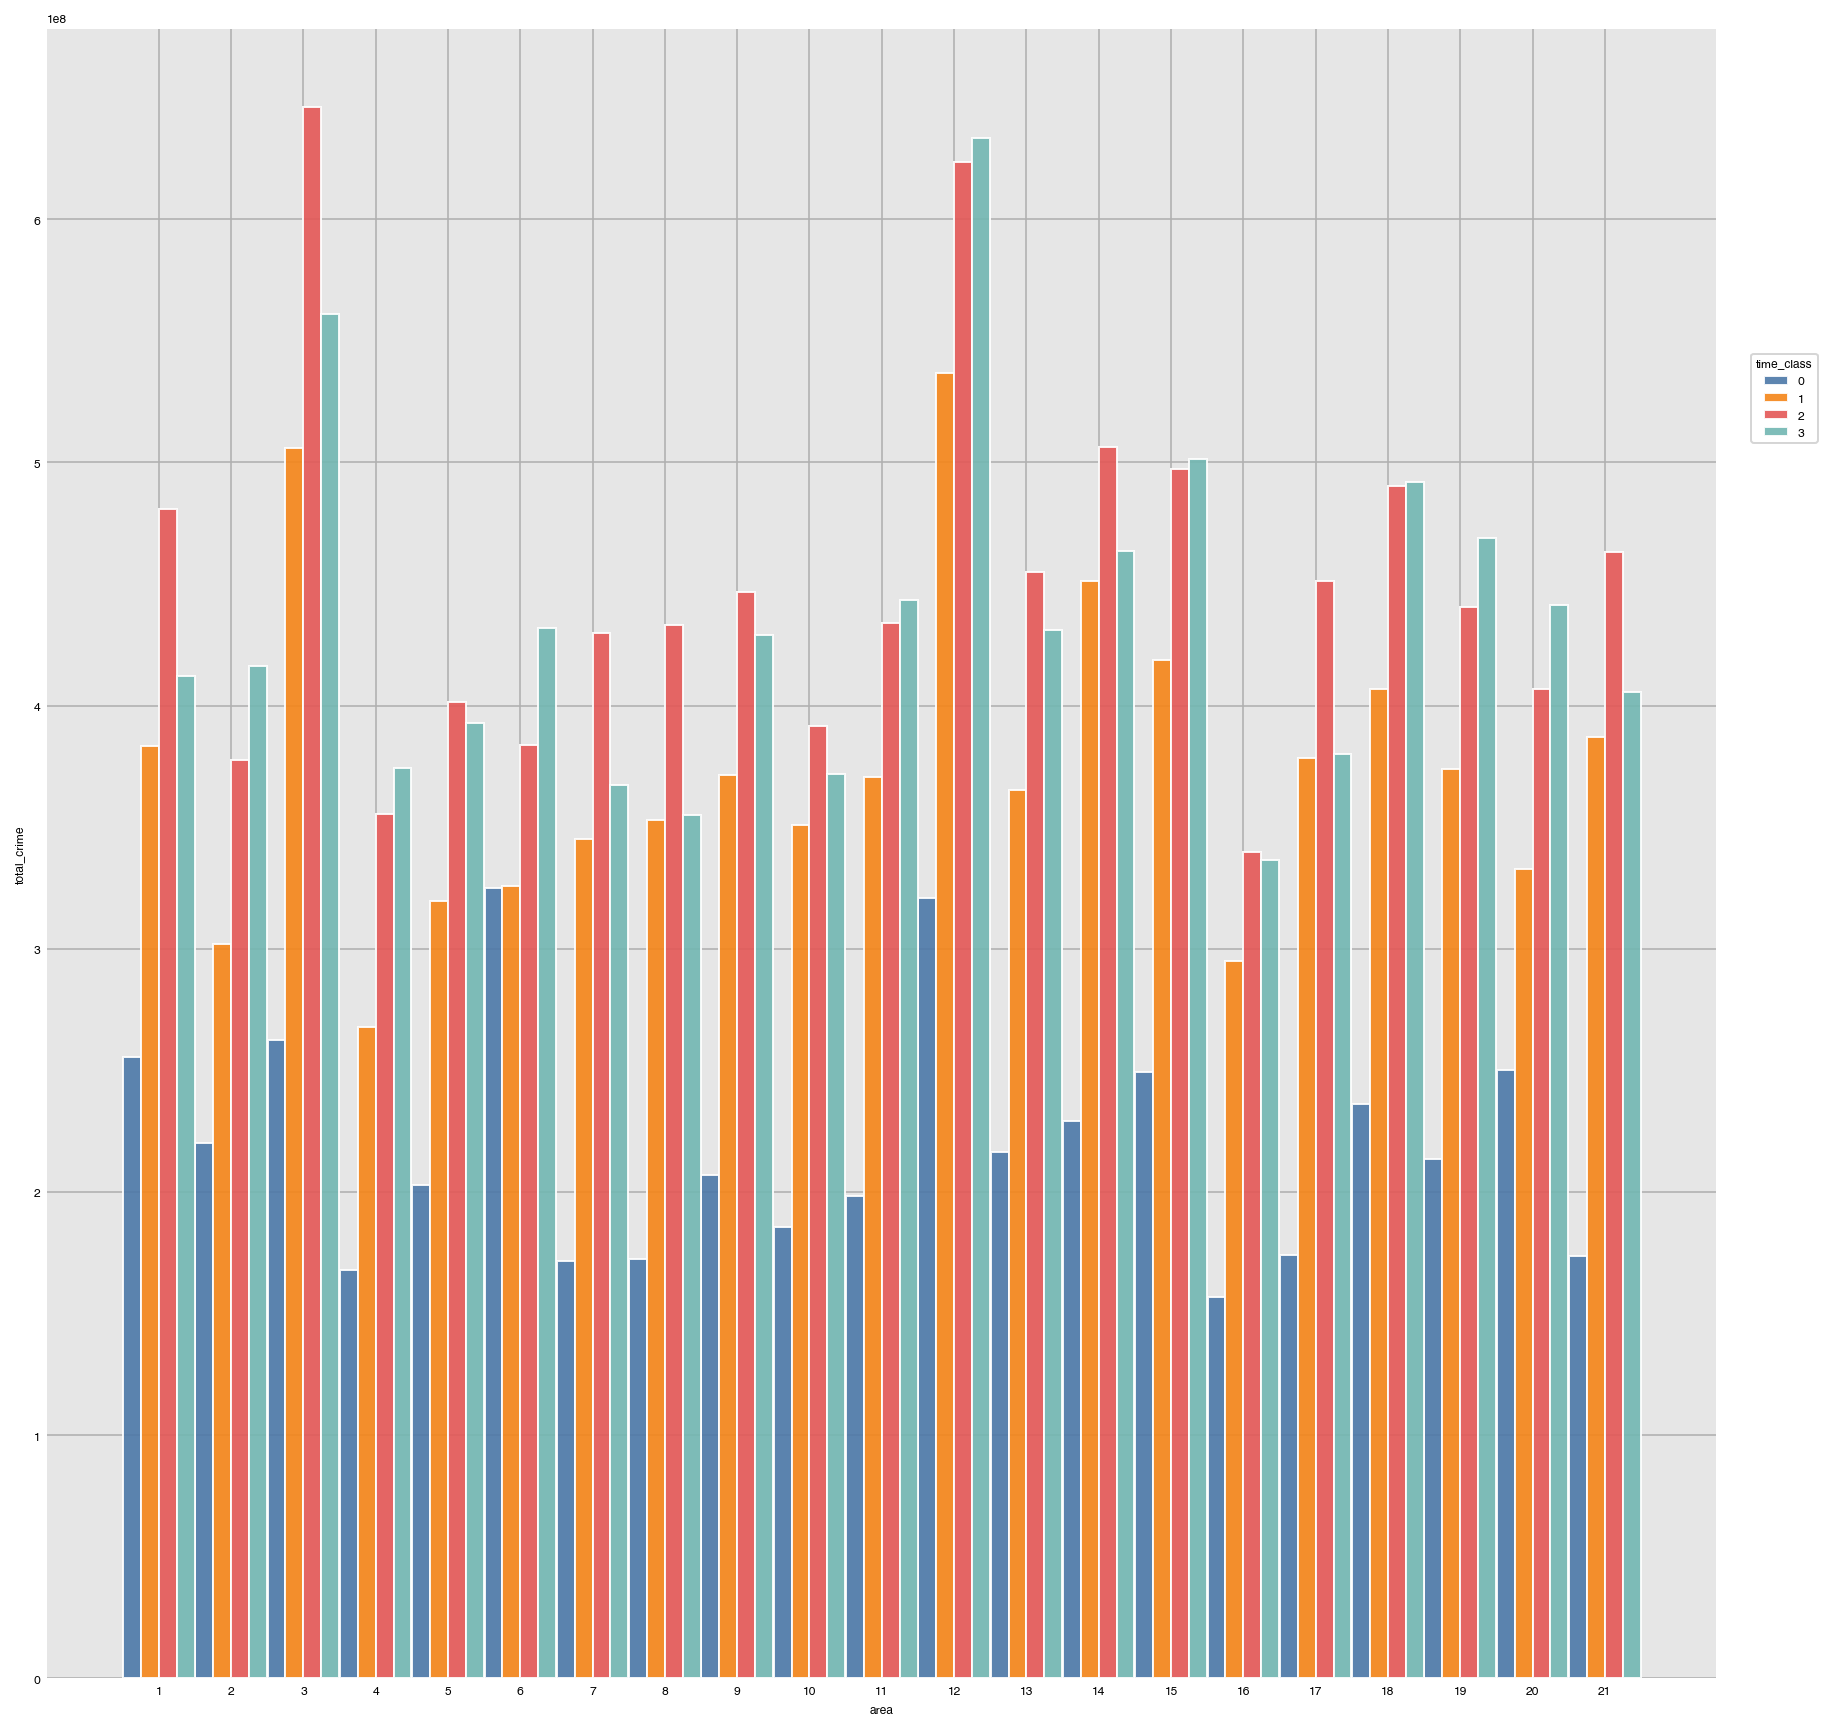

In [48]:
dxp.bar(x='area', y='total_crime', data=crime_new, aggfunc='sum', 
        split='time_class',figsize=(12,12),size=0.99)
##, col='area'

In [50]:
##Re-read data in order to find Area names for Area Codes
#crime2= pd.read_csv(r'/Users/cjmartinez323/Desktop/ML Class/UCLA_ML-master/crime19.csv')
crime2=pd.read_csv(r'C:\Users\Me\Desktop\ML\final\Crime_Data_from_2010_to_2019.csv')

In [51]:
##Top crime areas 
top_areas = [3,12,15,14,18]
df_top = crime2[crime2['AREA '].isin (top_areas)]

In [52]:
df_top['AREA NAME'].unique()

array(['Pacific', 'Southwest', 'Southeast', '77th Street', 'N Hollywood'],
      dtype=object)

In [53]:
df_top.sort_values(by='AREA ',inplace=True)
df_top.sample(n=10,random_state=0)

C:\Users\Me\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
812289,141508339,03/27/2014 12:00:00 AM,03/24/2014 12:00:00 AM,1800,15,N Hollywood,1559,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,5000 AUCKLAND AV,NaN,34.1613,-118.3604
1146182,151518777,09/24/2015 12:00:00 AM,09/24/2015 12:00:00 AM,1430,15,N Hollywood,1583,2,951,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 &...",...,IC,Invest Cont,951.0,998.0,NaN,NaN,11800 VENTURA BL,NaN,34.1451,-118.3875
1690549,181514942,07/23/2018 12:00:00 AM,07/22/2018 12:00:00 AM,630,15,N Hollywood,1513,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,7200 WHITSETT AV,NaN,34.2012,-118.4052
363143,110317267,07/25/2011 12:00:00 AM,06/27/2011 12:00:00 AM,1200,3,Southwest,332,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,3000 CHESAPEAKE AV,NaN,34.0276,-118.3450
326260,111817729,09/02/2011 12:00:00 AM,08/31/2011 12:00:00 AM,2300,18,Southeast,1824,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,700 E 101ST ST,NaN,33.9447,-118.2625
332450,110309650,03/31/2011 12:00:00 AM,03/31/2011 12:00:00 AM,100,3,Southwest,362,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,4000 COCO AV,NaN,34.0141,-118.3501
737137,131406584,02/07/2013 12:00:00 AM,02/06/2013 12:00:00 AM,2000,14,Pacific,1407,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,10100 NATIONAL BL,NaN,34.0293,-118.4055
885870,151504887,01/16/2015 12:00:00 AM,12/10/2014 12:00:00 AM,800,15,N Hollywood,1599,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,7000 MACAPA DR,NaN,34.1170,-118.3430
1957590,191219817,08/05/2019 12:00:00 AM,08/04/2019 12:00:00 AM,100,12,77th Street,1249,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,FIGUEROA,FLORENCE,33.9747,-118.2827
1432202,161211647,04/16/2016 12:00:00 AM,04/16/2016 12:00:00 AM,916,12,77th Street,1252,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,2900 W FLORENCE AV,NaN,33.9746,-118.3246
